<a href="https://colab.research.google.com/github/mayuripandey/Data-Analysis/blob/main/SOCIALNETWORK.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tweepy
import pandas as pd

In [2]:
consumer_key= "XXXXXXXXXXXXXXXXXXXXXXXXX"
consumer_secret_key="XXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXX"
access_token="XXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXX"
access_token_secret="XXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXX"

In [3]:
auth = tweepy.OAuthHandler(consumer_key, consumer_secret_key)
auth.set_access_token(access_token, access_token_secret)
api = tweepy.API(auth, wait_on_rate_limit=True, wait_on_rate_limit_notify=True, compression=True)

In [4]:
me = api.get_user(screen_name = "Mayuri11147223")
me.id

3382755314

In [5]:
user_list = ["3382755314"]
follower_list = []
for user in user_list:
    followers = []
    try:
        for page in tweepy.Cursor(api.followers_ids, user_id=user).pages():
            followers.extend(page)
            print(len(followers))
    except tweepy.TweepError:
        print("error")
        continue
    follower_list.append(followers)

30


In [6]:
df = pd.DataFrame(columns=['source','target']) #Empty DataFrame
df['target'] = follower_list[0] #Set the list of followers as the target column
df['source'] = 3382755314

In [7]:
import networkx as nx
G = nx.from_pandas_edgelist(df, 'source', 'target') #Turn df into graph
pos = nx.spring_layout(G) #specify layout for visual

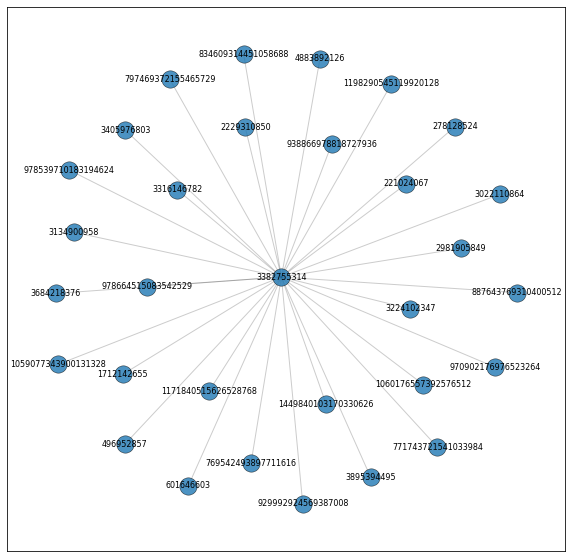

In [8]:
import matplotlib.pyplot as plt
f, ax = plt.subplots(figsize=(10, 10))
plt.style.use('ggplot')
nodes = nx.draw_networkx_nodes(G, pos,
                               alpha=0.8)
nodes.set_edgecolor('k')
nx.draw_networkx_labels(G, pos, font_size=8)
nx.draw_networkx_edges(G, pos, width=1.0, alpha=0.2)

In [9]:
user_list = list(df['target']) #Use the list of followers we extracted in the code above i.e. my 450 followers
for userID in user_list:
    print(userID)
    followers = []
    follower_list = []

    # fetching the user
    user = api.get_user(userID)

    # fetching the followers_count
    followers_count = user.followers_count

    try:
        for page in tweepy.Cursor(api.followers_ids, user_id=userID).pages():
            followers.extend(page)
            print(len(followers))
            if followers_count >= 5000: #Only take first 5000 followers
                break
    except tweepy.TweepError:
        print("error")
        continue
    follower_list.append(followers)
    temp = pd.DataFrame(columns=['source', 'target'])
    temp['target'] = follower_list[0]
    temp['source'] = userID
    df = df.append(temp)
    df.to_csv("networkOfFollowers.csv")

1449840103170330626
1
1198290545119920128
8
1171840515626528768
29
1060176557392576512
10
1059077343900131328
3
978664515083542529
1
978539710183194624
5
970902176976523264
10
887643769310400512
16
938866978818727936
2
929992924569387008
278128524
50
496952857
20
834609314451058688


Rate limit reached. Sleeping for: 884


23
3022110864
11
601646603
113
3895394495
7
797469372155465729
35
1712142655
error
771743721541033984
3
769542493897711616
5
4883892126
29
3224102347
30
2229310850
37
3134900958
16
221024067
10
3405976803
258
3684218376
12
2981905849
52
3316146782


Rate limit reached. Sleeping for: 896


158


In [14]:
df = pd.read_csv('networkOfFollowers.csv') #Read into a df

In [15]:
G = nx.from_pandas_edgelist(df, 'source', 'target')

In [16]:
G.number_of_nodes() #Find the total number of nodes in this graph

936

In [19]:
G_sorted = pd.DataFrame(sorted(G.degree, key=lambda x: x[1], reverse=True))

In [21]:
G_sorted.columns = ["nconst","degree"]

In [22]:
G_sorted.head()

,nconst,degree
0,3.405977e+09,259
1,3.316147e+09,159
2,6.016466e+08,114
3,2.781285e+08,52
4,2.981906e+09,52


In [24]:
u = api.get_user(340597709)
u.screen_name

'ViictoriaLinnzy'

In [25]:
G_tmp = nx.k_core(G, 10) #Exclude nodes with degree less than 10

In [34]:
from community import community_louvain
partition = community_louvain.best_partition(G_tmp)
#Turn partition into dataframe
partition1 = pd.DataFrame([partition]).T
partition1 = partition1.reset_index()
partition1.columns = ['names','group']

In [36]:
G_sorted = pd.DataFrame(sorted(G_tmp.degree, key=lambda x: x[1], reverse=True))

In [30]:
G_sorted.head()
dc = G_sorted